<a href="https://colab.research.google.com/github/eduardogranillo/FisicaComputacional/blob/master/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividades 1. Sintetizar las características principales del conjunto de datos.

In [ ]:
# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

In [ ]:
# concentración de las operaciones del dataframe original df_dist

# Tomar la dirección URL del archivo en raw
url = 'https://raw.githubusercontent.com/eduardogranillo/FisicaComputacional/master/Actividad1/ClimatologiaDiaria.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.month

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16063 entries, 0 to 16062
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   16063 non-null  datetime64[ns]
 1   Precip  16058 non-null  float64       
 2   Evap    10094 non-null  float64       
 3   Tmax    15199 non-null  float64       
 4   Tmin    15191 non-null  float64       
 5   Año     16063 non-null  int64         
 6   Mes     16063 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 878.6 KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1956-01-01     0.0   NaN   NaN   NaN  1956    1
1 1956-01-02     0.0   NaN   NaN   NaN  1956    1
2 1956-01-03     0.0   NaN   NaN   NaN  1956    1
3 1956-01-04     0.0   NaN   NaN   NaN  1956    1
4 1956-01-05     0.0   NaN   NaN   NaN  1956    1


In [ ]:
# Conversión de la columna de Mes a cadena de caracteres (en este caso Variable
# categórica), en lugar de tener los meses denotados por enteros.
# Función .dt.strftime('%b'), %b representa los meses en formato: Jan, Feb,...

# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16063 entries, 0 to 16062
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   16063 non-null  datetime64[ns]
 1   Precip  16058 non-null  float64       
 2   Evap    10094 non-null  float64       
 3   Tmax    15199 non-null  float64       
 4   Tmin    15191 non-null  float64       
 5   Año     16063 non-null  int64         
 6   Mes     16063 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 878.6+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1956-01-01     0.0   NaN   NaN   NaN  1956  Jan
1 1956-01-02     0.0   NaN   NaN   NaN  1956  Jan
2 1956-01-03     0.0   NaN   NaN   NaN  1956  Jan
3 1956-01-04     0.0   NaN   NaN   NaN  1956  Jan
4 1956-01-05     0.0   NaN   NaN   NaN  1956  Jan
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
16058 2010-06-26     0.0  10.8  33.0  14.5  2010  Jun
16059

# Actividad 2. Crear Histogramas de las variables de Precipitación, Evaporación, Temperaturas Máxima y Mínima de el conjunto de datos que se están analizando

Histograma de precipitación

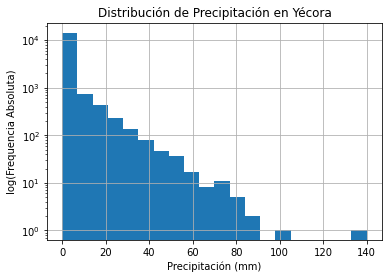

In [ ]:
#Crear Histogramas de las variables de Precipitación, Evaporación, Temperaturas 
#Máxima y Mínima de el conjunto de datos que se están analizando 
#(Función: sns.histplot()). Complementar en su caso con las gráficas de la
#función de densidad de probabilidad correspondiente (Función: sns.kdeplot())

# Hacemos la gráfica utilizando escala logarítmica en el Eje y.
plt.hist(df_meteo.Precip, bins=20)
plt.yscale('log')
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en Yécora')
plt.grid()
plt.show()

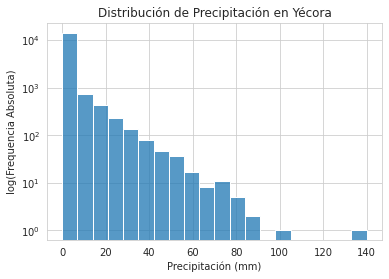

In [ ]:
# Misma gráfica pero con Seaborn
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en Yécora')
sns.histplot(data=df_meteo, x='Precip', bins=20, log_scale=(False,True));

Histograma de evaporación


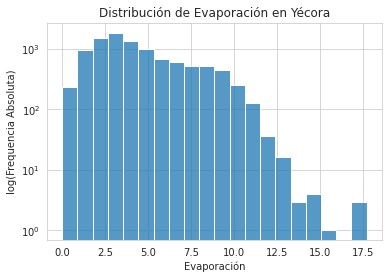

In [ ]:
# Misma gráfica pero con Seaborn
sns.set_style("whitegrid")
plt.xlabel('Evaporación')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Evaporación en Yécora')
sns.histplot(data=df_meteo, x='Evap', bins=20, log_scale=(False,True));

Histograma de Temperatura Máxima


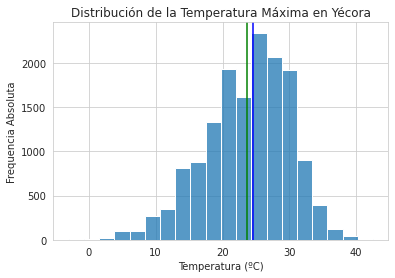

In [ ]:
# Gráfica de la Temperatura Máxima
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmax.median() 
Tprom = df_meteo.Tmax.mean()

sns.histplot(data=df_meteo, x='Tmax', bins=20);
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Tmed, color = 'b', label = 'm') 
plt.axvline(x = Tprom, color = 'g', label = 'x')

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Yécora')

plt.show()

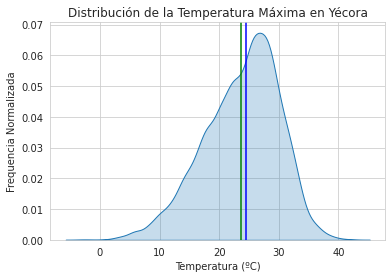

In [ ]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Tmax, fill=True);
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Yécora')

plt.show()

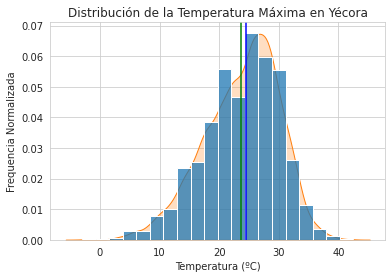

In [ ]:
# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Tmax', bins=20, stat='density');
sns.kdeplot(df_meteo.Tmax, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Yécora')

plt.show()

Gráfica de la Temperatura Mínima

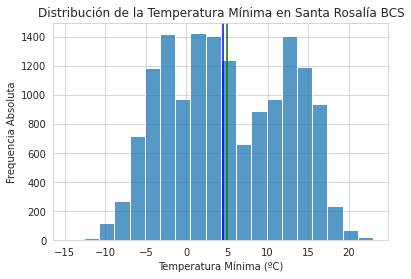

In [ ]:
# Gráfica de la Temperatura Mínima
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmin.median() 
Tprom = df_meteo.Tmin.mean()

sns.histplot(data=df_meteo, x='Tmin', bins=20);
plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura Mínima (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en Santa Rosalía BCS')

plt.show()


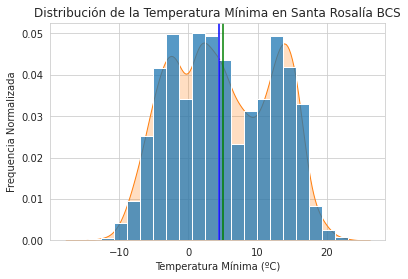

In [ ]:
# Gráfica de la Temperatura Mínima y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.Tmin.median() 
Tprom = df_meteo.Tmin.mean()

sns.histplot(data=df_meteo, x='Tmin', bins=20, stat='density');
sns.kdeplot(df_meteo.Tmin, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura Mínima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Santa Rosalía BCS')

plt.show()

# Actividad 3: Gráficas de Cajas (Boxplot)

Temperatura Máxima

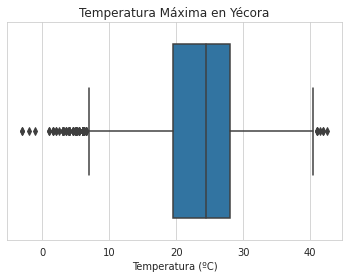

In [ ]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Máxima en Yécora');

Temperatura Mínima

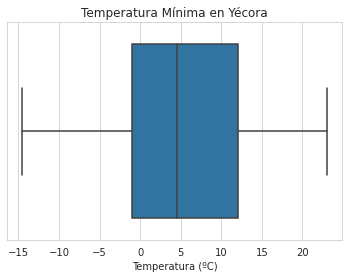

In [ ]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Mínima en Yécora');

Evaporación

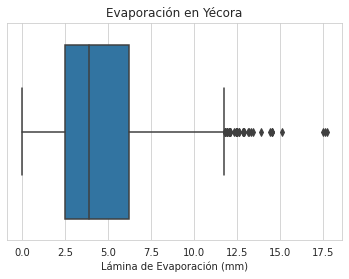

In [ ]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Evap, data=df_meteo, orient='h').set(xlabel='Lámina de Evaporación (mm)', 
                                                     title='Evaporación en Yécora');

# Actividad 4: Gráficas de barras para la Precipitación agrupado por años y después por meses



In [ ]:
# Seleccionaremos un conjunto de años de 20 años  
df_30 = df_meteo[(df_meteo['Año'] >= 1950) & (df_meteo['Año'] < 1970)]
df_60 = df_meteo[(df_meteo['Año'] >= 1970) & (df_meteo['Año'] < 1990)]
df_90 = df_meteo[(df_meteo['Año'] >= 1990) & (df_meteo['Año'] < 2011)]

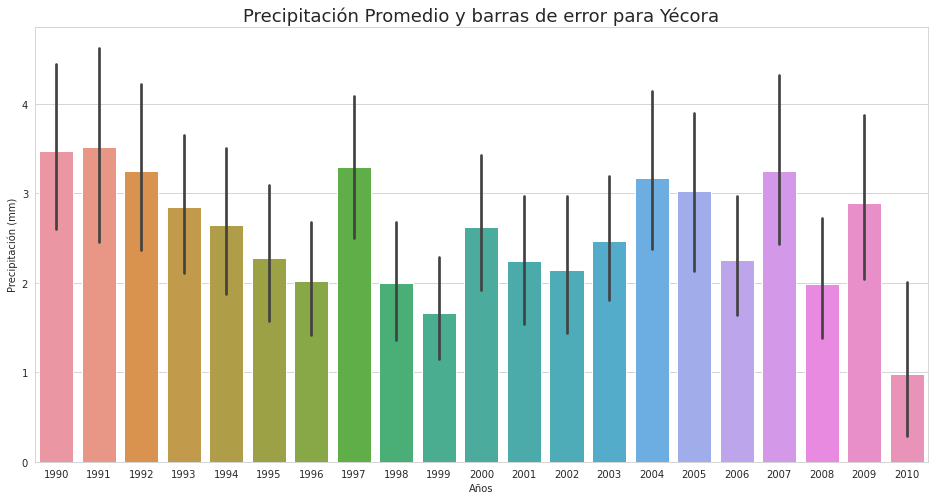

In [ ]:
# Gráfica de Precipitación últimos 20 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Yécora', fontsize=18)

plt.show()

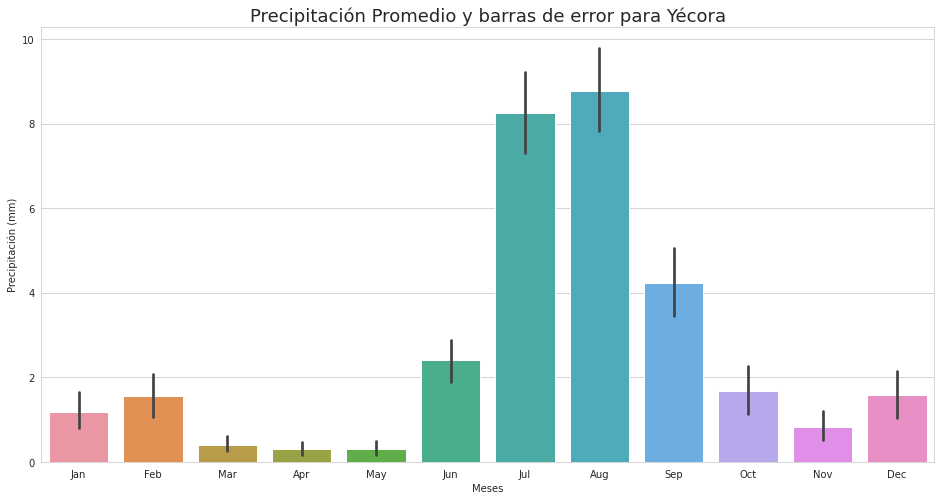

In [ ]:
# Gráfica de Precipitación últimos 20 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Yécora', fontsize=18)

plt.show()

# Actividad 5. Colección de los últimos 20 años de datos, utilizando condiciones de filtrado por un rango de años. Gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo (Últimos 20 Años)



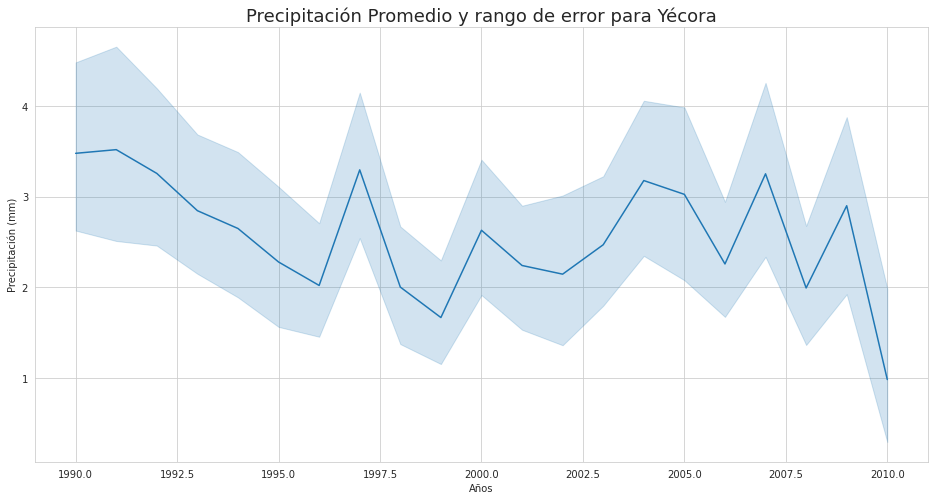

In [25]:
# Gráfica de Precipitación últimos 20 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Yécora', fontsize=18)

plt.show()

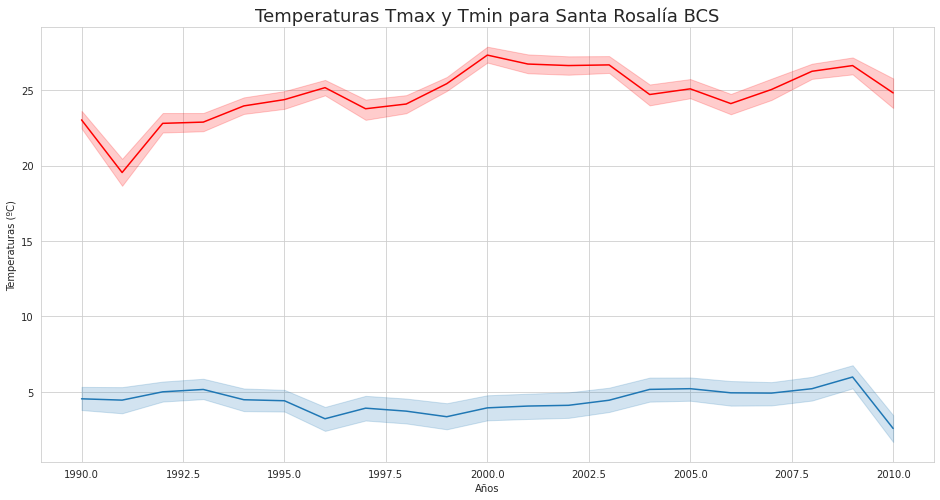

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_90, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_90);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Yécora', fontsize=18)

plt.show()

# Actividad 6.  Del conjunto de 20 años de datos, diagramas de cajas para observar la variabilidad de las Temperaturas (Max y Min) y la Evaporación agrupados por Mes.

Temperatura Máximo

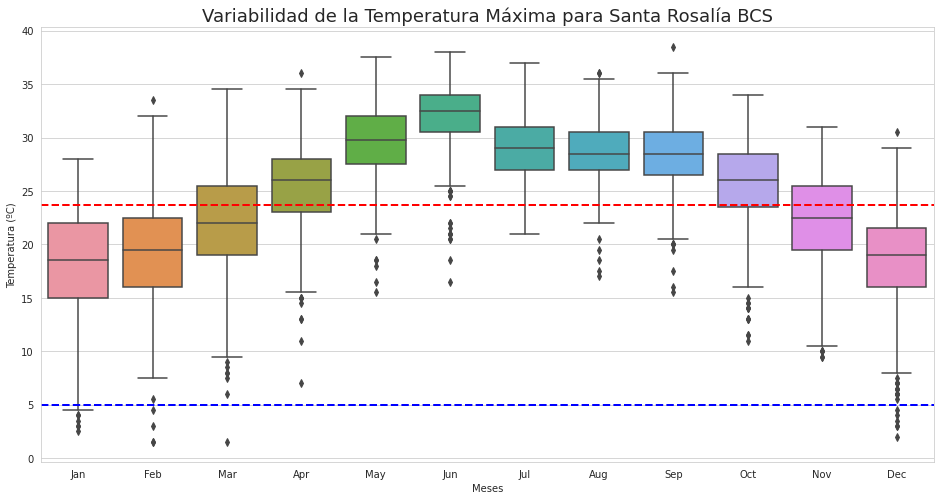

mean(Tmax) =  23.696230015132574
mean(Tmin) =  4.964722533078797
Diff Tmax_ave-Tmin_ave =  18.73150748205378


In [27]:
# Gráfica de Temepraturas Máximas en los últimos 20 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_90);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Yécora', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

Temperatura Mínima

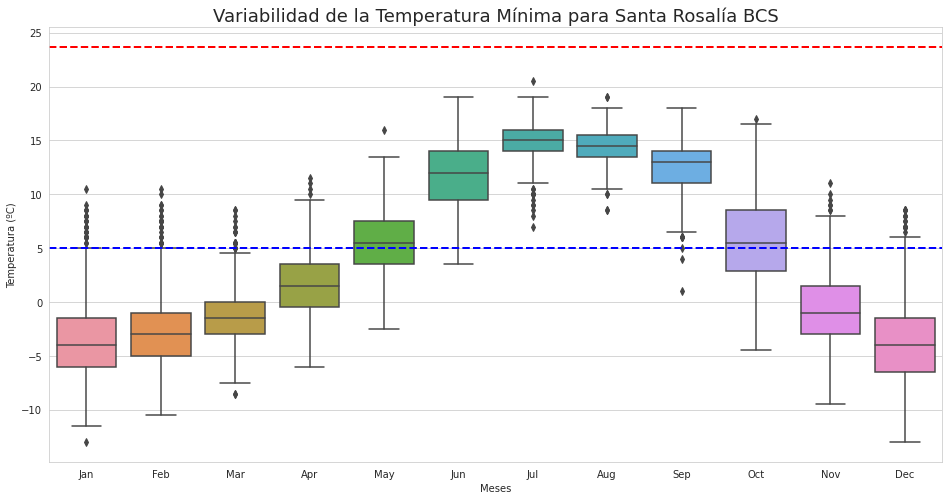

mean(Tmax) =  23.696230015132574
mean(Tmin) =  4.964722533078797
Diff Tmax_ave-Tmin_ave =  18.73150748205378


In [28]:
# Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_90);
# Linea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Yécora', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))


Evaporación

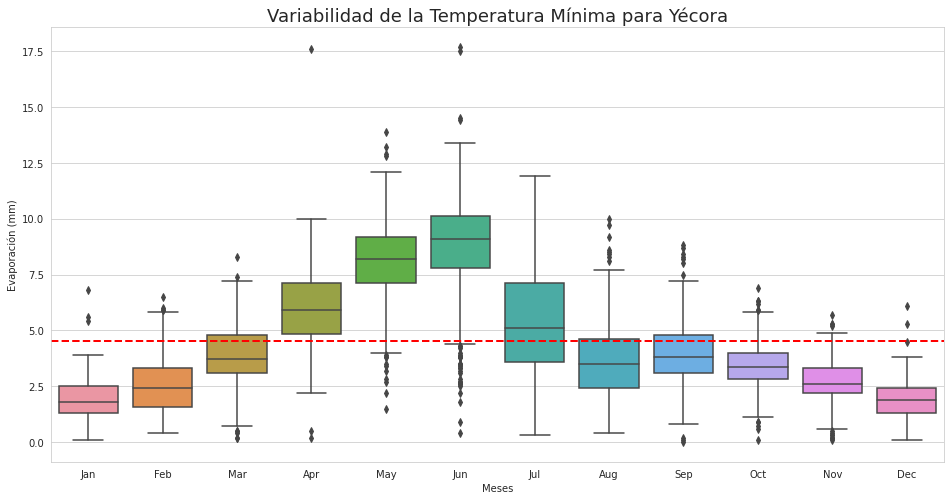

mean(Evap) =  4.52944323360414


In [33]:
# Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Evaporación
Evap_ave = df_meteo.Evap.mean()

# Gráfica de cajas de la Evaporación 
g=sns.boxplot(x='Mes', y='Evap', data=df_90);
# Linea de Evaporación promedio 
plt.axhline(Evap_ave, color = 'r', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Evaporación (mm)')
plt.title('Variabilidad de la Temperatura Mínima para Yécora', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Evap) = ', Evap_ave)

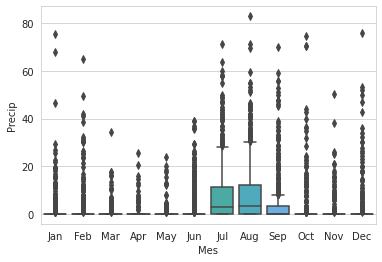

In [34]:
# La gráfica de Boxplot no brinda información de la Precipitación por mes
sns.boxplot(x='Mes' , y='Precip', data=df_90);